In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df_clean = df.copy(deep=True)

In [5]:
df_clean['director'] = df_clean['director'].fillna('Unknown')

In [6]:
df_clean['cast'] = df_clean['cast'].fillna('Not Available')

In [7]:
df_clean['country'] = df_clean['country'].fillna('Unknown')

In [8]:
df_clean = df_clean.dropna(subset = ['date_added'])

In [9]:
df_clean['rating'] = df_clean['rating'].fillna('Not Rated')

In [10]:
df_clean = df_clean.dropna(subset = ['duration'])

In [11]:
df_clean.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# What is the overall trend of Netflix content added over the years?

In [12]:
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'].str.strip(), errors='coerce')


In [13]:
df_clean['year_added'] = df_clean['date_added'].dt.year

In [14]:
df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Available,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


In [15]:
df_clean.loc[df_clean['type'] == 'Movie'].shape

(6128, 13)

In [16]:
df_clean.loc[df_clean['type'] == 'TV Show'].shape

(2666, 13)

In [17]:
df_clean.sort_values( by = 'year_added' , ascending = True)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
6611,s6612,TV Show,Dinner for Five,Unknown,Not Available,United States,2008-02-04,2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008
5957,s5958,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,2006,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008
5955,s5956,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,2009,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009
5956,s5957,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,2007,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009
7370,s7371,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,s45,Movie,Jaws: The Revenge,Joseph Sargent,"Lorraine Gary, Lance Guest, Mario Van Peebles,...",United States,2021-09-16,1987,PG-13,91 min,"Action & Adventure, Horror Movies, Thrillers","After another deadly shark attack, Ellen Brody...",2021
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,Not Available,Unknown,2021-09-16,2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...,2021
46,s47,Movie,Safe House,Daniel Espinosa,"Denzel Washington, Ryan Reynolds, Vera Farmiga...","South Africa, United States, Japan",2021-09-16,2012,R,115 min,Action & Adventure,Young CIA operative Matt Weston must get a dan...,2021
5993,s5994,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,2009,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021


In [18]:
year_counts = df_clean['year_added'].value_counts()

[]

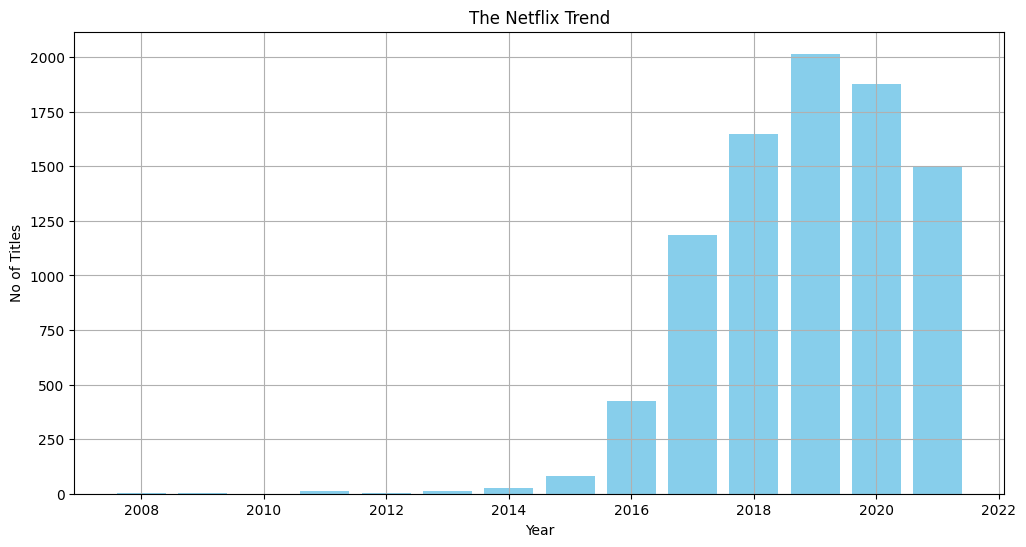

In [19]:
plt.figure(figsize=(12,6))
plt.bar(year_counts.index , year_counts.values , color = 'skyblue')
plt.title('The Netflix Trend')
plt.xlabel('Year')
plt.ylabel('No of Titles')
plt.grid(True)
plt.plot()

# Which type of content (Movie or TV Show) is more common?

In [20]:
df_clean['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [21]:
common_type = df_clean['type'].value_counts()

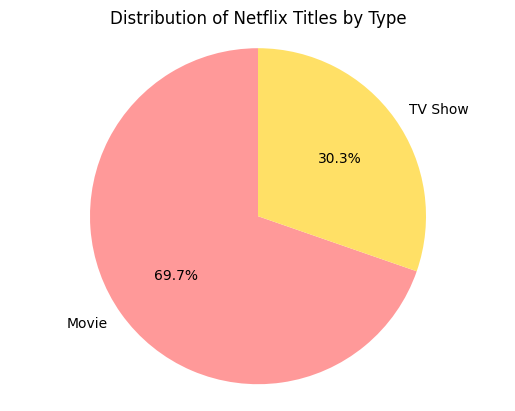

In [22]:

plt.pie(common_type.values, labels=common_type.index, autopct='%1.1f%%', startangle=90,
        colors=['#FF9999', '#FFE066', '#B3E2CD', '#D3A4FF'])
plt.axis('equal')  
plt.title('Distribution of Netflix Titles by Type')
plt.show()


# Top 10 genres with the most titles?

In [23]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [24]:
df_clean = df_clean.dropna(subset=['listed_in'])

In [25]:
all_genres = df_clean['listed_in'].str.split(',')

In [26]:
top_10 = all_genres.value_counts().head()

In [27]:
top_10

listed_in
[Dramas,  International Movies]                         362
[Documentaries]                                         359
[Stand-Up Comedy]                                       334
[Comedies,  Dramas,  International Movies]              274
[Dramas,  Independent Movies,  International Movies]    252
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 Netflix Genres'}, xlabel='listed_in'>

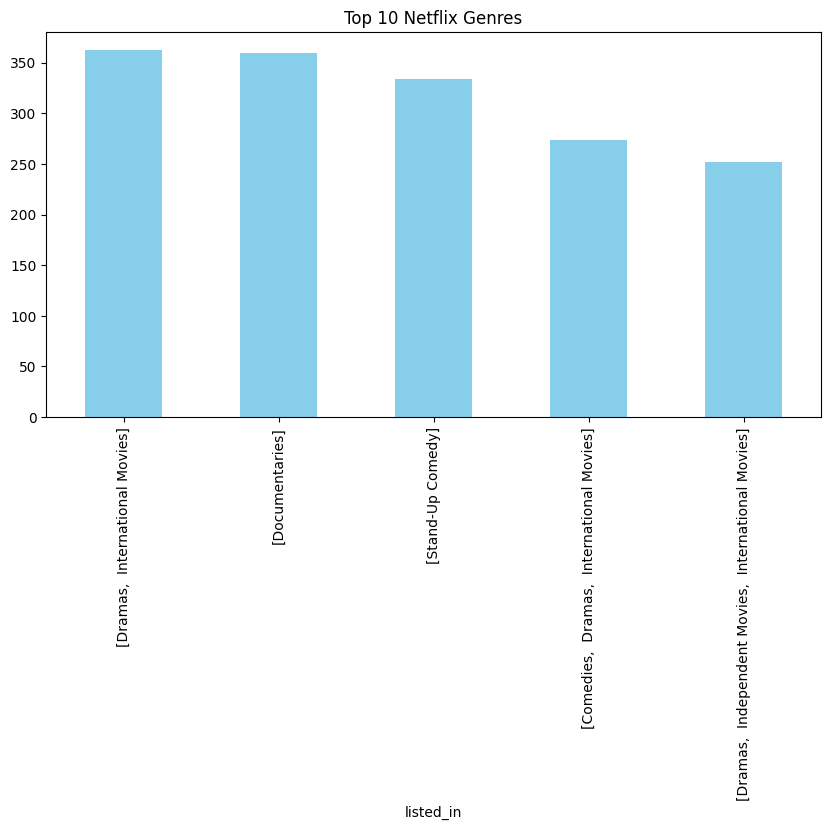

In [28]:
top_10.plot(kind = 'bar' , figsize = (10,5) , color = 'skyblue' ,title='Top 10 Netflix Genres')

# Which countries contribute the most content to Netflix?

In [29]:
df_clean = df_clean.drop(df_clean.columns[-2], axis=1)

In [30]:
df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Available,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021


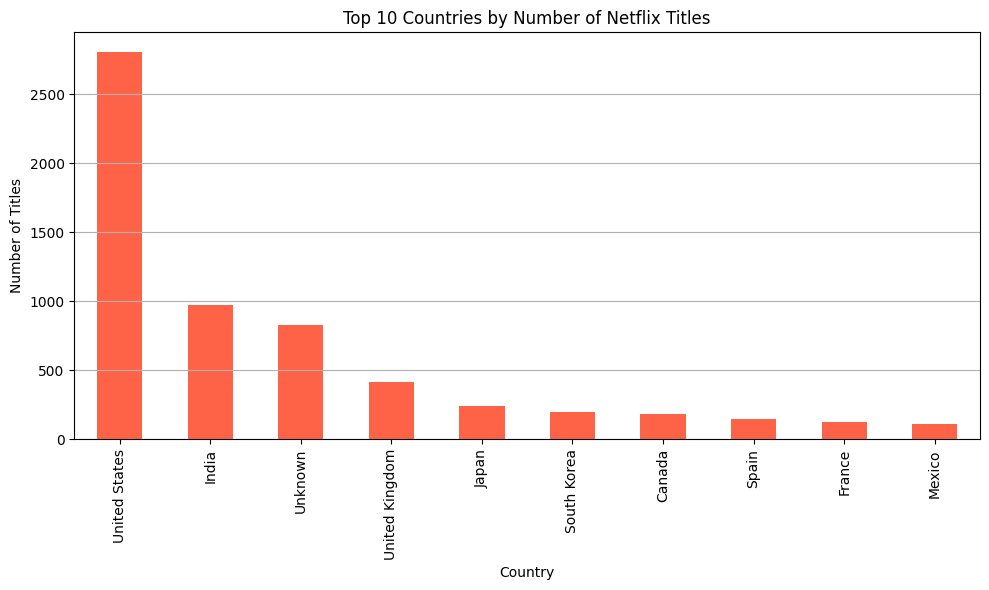

In [31]:


top_country = df_clean['country'].value_counts().head(10)


plt.figure(figsize=(10,6))
top_country.plot(kind='bar', color='tomato')
plt.title('Top 10 Countries by Number of Netflix Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Trend of movie vs TV show additions year by year

In [32]:
Trend = df_clean['type'].value_counts()

In [33]:
Trend = df_clean.groupby(['year_added', 'type']).size().unstack()

In [34]:
Trend

type,Movie,TV Show
year_added,,
2008,1.0,1.0
2009,2.0,NaN
2010,1.0,NaN
2011,13.0,NaN
2012,3.0,NaN
2013,6.0,5.0
2014,19.0,5.0
2015,56.0,26.0
2016,251.0,176.0


[]

<Figure size 1000x600 with 0 Axes>

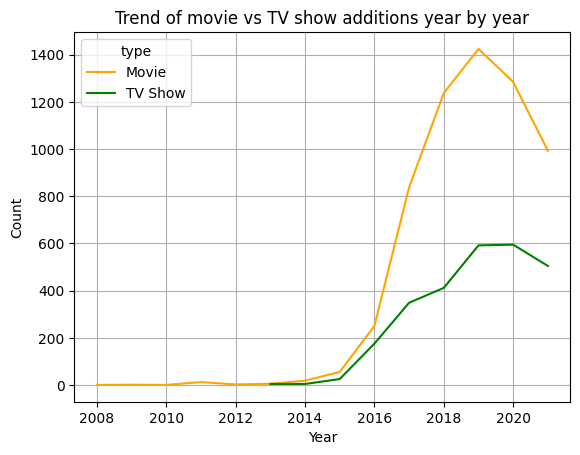

In [56]:
plt.figure(figsize=(10,6))
Trend.plot(kind = 'line' , color = ['orange' , 'Green'])
plt.title('Trend of movie vs TV show additions year by year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.plot()

# Which are the most frequent ratings (PG, R, etc.)?

In [40]:
df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Available,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021


In [45]:
freq_rate = df_clean['rating'].value_counts()
freq_rate

rating
TV-MA        3205
TV-14        2157
TV-PG         861
R             799
PG-13         490
TV-Y7         333
TV-Y          306
PG            287
TV-G          220
NR             79
G              41
TV-Y7-FV        6
Not Rated       4
NC-17           3
UR              3
Name: count, dtype: int64

[]

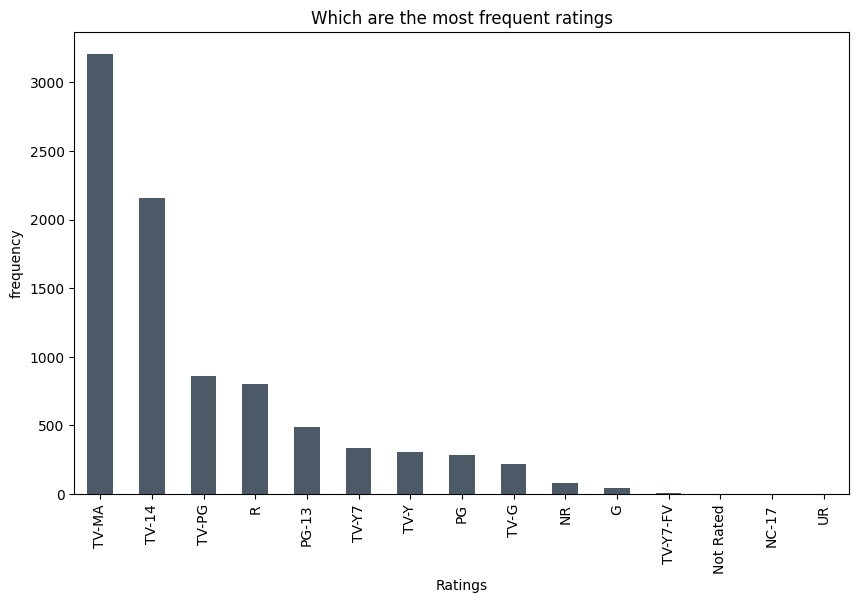

In [55]:
plt.figure(figsize=(10,6))
freq_rate.plot(kind = 'bar' , color = '#4C5967')
plt.title('Which are the most frequent ratings')
plt.xlabel('Ratings')
plt.ylabel('frequency')
plt.plot()


# Top 10 directors with the most content

In [57]:
df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Available,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021


In [64]:
top_10_directors =  df_clean['director'].value_counts().head(10)
top_10_directors

director
Unknown                   2624
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Suhas Kadav                 16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Name: count, dtype: int64

[]

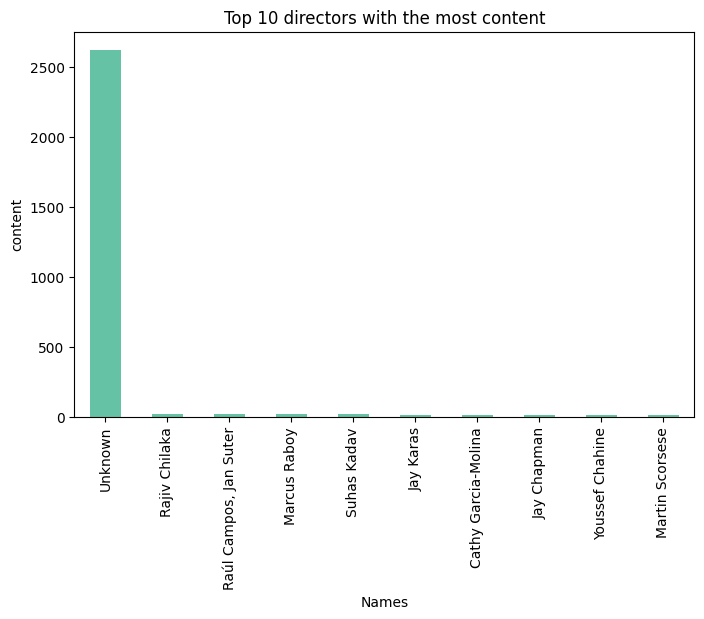

In [65]:
top_10_directors.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Set2')
plt.title('Top 10 directors with the most content')
plt.xlabel('Names')
plt.ylabel('content')
plt.plot()

# WordCloud from content descriptions

In [68]:
df_clean['description'] = df['description']

In [69]:
df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Available,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021,"Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021,In a city of coaching centers known to train I...


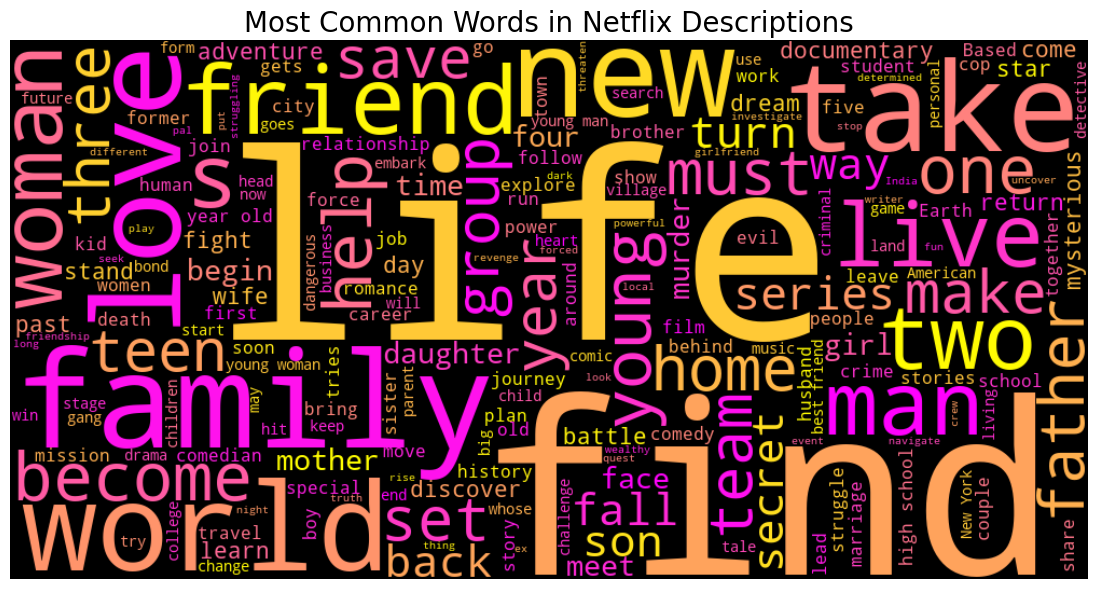

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


df_descriptions = df_clean['description'].dropna()

text = ' '.join(df_descriptions)

wordcloud = WordCloud(width=1000, height=500, background_color='black', colormap='spring').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Descriptions', fontsize=20)
plt.show()
